In [5]:
from imports import *
from glob import glob
import scipy
import pickle

from skimage import measure, morphology 
from scipy import ndimage

C:\Users\leetw\Anaconda3\envs\keras\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [1]:
def from_binary_masks_to_colored_mask(masks):
    ### masks is a list of binary masks
    cmap=plt.cm.get_cmap('nipy_spectral')
    final = np.zeros((masks[0].shape[0], masks[0].shape[1], 3))
    print(final.shape)
    for i in range(len(masks)):
        final[:,:,0] += masks[i]*cmap((i+1)/(len(masks)+1))[0]
        final[:,:,1] += masks[i]*cmap((i+1)/(len(masks)+1))[1]
        final[:,:,2] += masks[i]*cmap((i+1)/(len(masks)+1))[2]
    return final

In [7]:
def read_masks_from_dir(path):
    ### path comes with / at the end
    masks = []
    paths = glob(path + '*')
    for im_path in paths:
        masks.append(plt.imread(im_path))
    return masks

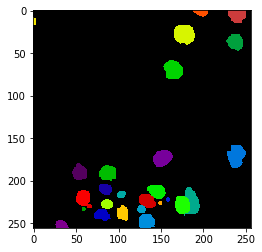

In [8]:
if __name__=="__main__":
    path = "input/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/"
    masks = read_masks_from_dir(path)
    colored_mask = from_binary_masks_to_colored_mask(masks)
    plt.imshow(colored_mask)

In [5]:
def from_masks_to_binary_mask(masks):
    final = np.zeros((masks[0].shape[0], masks[0].shape[1]))
    for i in range(len(masks)):
        msk = masks[i]
        final += msk
    return final

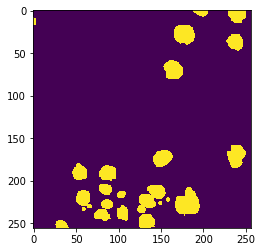

In [6]:
if __name__=="__main__":
    mask = from_masks_to_binary_mask(masks)
    plt.imshow(mask)

In [7]:
def from_binary_mask_to_masks(binary_mask):
    labeled_array, num_features = scipy.ndimage.label(binary_mask)
    masks = []
    for i in range(1, num_features+1):
        masks.append(labeled_array==i)
    return masks

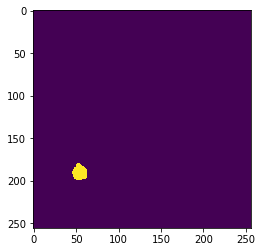

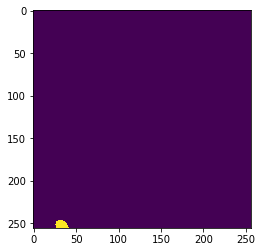

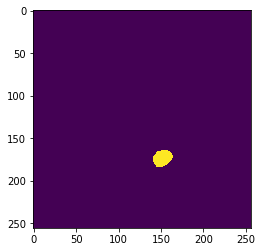

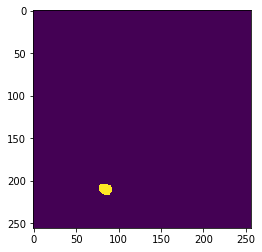

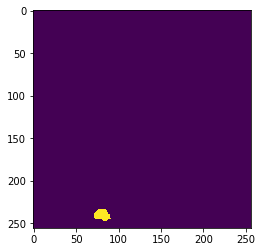

In [8]:
if __name__=="__main__":
    new_masks = from_binary_mask_to_masks(mask)
    for i in range(min(len(masks), 5)):
        plt.figure()
        plt.imshow(masks[i])

In [9]:
def from_mask_to_contours(mask):
    ### mask is a single 2D mask image
    contours = measure.find_contours(mask, 0.8)
    disk_kernel = morphology.disk(1)
    con_image = np.zeros(mask.shape)
    
    for con in contours:
        con = con.astype('int')
        con_image[con[:,0], con[:,1]] = 1
    con_image = ndimage.binary_dilation(con_image, disk_kernel)
    
    return con_image

In [9]:
if __name__=="__main__":
    con_image = from_mask_to_contours(mask)
    plt.subplot(1,2,1)
    plt.imshow(mask)
    plt.subplot(1,2,2)
    plt.imshow(con_image)

NameError: name 'from_mask_to_contours' is not defined

In [11]:
def from_masks_to_contours(masks):
    con_image = np.zeros(masks[0].shape)
    for mask in masks:
        con_image = np.maximum(con_image, from_mask_to_contours(mask))
    return con_image

22


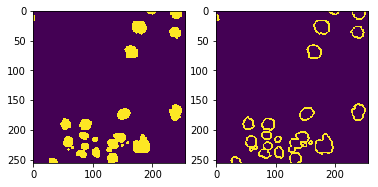

In [12]:
if __name__=="__main__":
    masks = from_binary_mask_to_masks(mask)
    print(len(masks))
    con_image = from_masks_to_contours(masks)
    plt.subplot(1,2,1)
    plt.imshow(mask)
    plt.subplot(1,2,2)
    plt.imshow(con_image)

In [13]:
# samples = glob("input/stage1_train/*")
# samples[0]

In [14]:
# glob(samples[0] + "/images/*")

In [15]:
# images = []
# binary_masks = []
# colored_masks = []
# for sample in samples[:3]:
#     print("---------------------------------")
#     img_f = glob(sample + "/images/*")
#     images.append(plt.imread(img_f[0])[:, :, :3])
#     masks = read_masks_from_dir(sample + "/masks/")
#     print("img shape:", images[-1].shape)
#     for mask in masks:
#         print("\n", mask.shape)
#     binary_masks.append(from_masks_to_binary_mask(masks))
#     colored_masks.append(from_binary_masks_to_colored_mask(masks))
# # binary_masks = np.stack(binary_masks)
# # colored_masks = np.stack(colored_masks)

In [16]:
def read_data_sample_from_dir(path, use_masks=True):
    img_f = glob(path + "/images/*")
    img = plt.imread(img_f[0])[:, :, :3]
    if use_masks:
        masks = read_masks_from_dir(path + "/masks/")
        binary_mask = from_masks_to_binary_mask(masks)
        contours_mask = from_masks_to_contours(masks)
        colored_mask = from_binary_masks_to_colored_mask(masks)
    else:
        masks=None
        binary_mask=None
        contours_mask=None
        colored_mask=None
        
    return img, masks, binary_mask, contours_mask, colored_mask

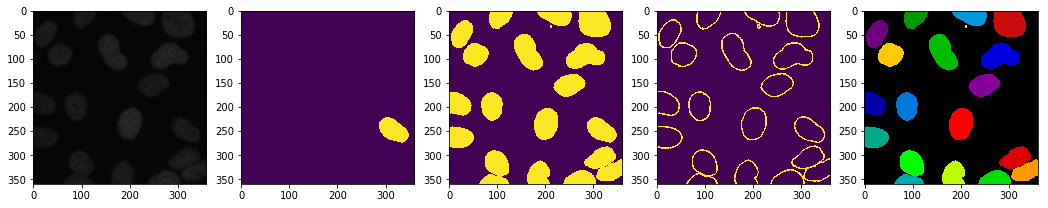

In [17]:
if __name__=="__main__":
    path = "input/stage1_train/2c840a94d216f5ef4e499b53ae885e9b022cbf639e004ec788436093837823b2/"
    img, masks, binary_mask, contours_mask, colored_mask = read_data_sample_from_dir(path)

    plt.figure(figsize=(18, 18))
    plt.subplot(1,5,1)
    plt.imshow(img)
    plt.subplot(1,5,2)
    plt.imshow(masks[0])
    plt.subplot(1,5,3)
    plt.imshow(binary_mask)
    plt.subplot(1,5,4)
    plt.imshow(contours_mask)
    plt.subplot(1,5,5)
    plt.imshow(colored_mask)

In [18]:
def create_all_data(path, use_masks):
    dirs = [subdir+"/" for subdir in glob(path+"*")]

    images = []
    if use_masks:
#         all_masks = []
        binary_masks = []
        contours_masks = []
        colored_masks = []
    else:
        all_masks = None
        binary_masks = None
        contours_masks = None
        colored_masks = None

    for subdir in tqdm(dirs):
        img, masks, binary_mask, contours_mask, colored_mask = read_data_sample_from_dir(subdir, use_masks=use_masks)
        images.append(img)
        if use_masks:
#             all_masks.append(masks)
            binary_masks.append(binary_mask)
            contours_masks.append(contours_mask)
            colored_masks.append(colored_mask)
    
#     return images, all_masks, binary_masks, contours_masks, colored_masks
    return images, binary_masks, contours_masks, colored_masks

In [19]:
if __name__=="__main__" and not os.path.exists("pickles/train_images.p"):
    use_masks=True
    path = "input/stage1_train/"
    images, binary_masks, contours_masks, colored_masks = read_all_data(path, use_masks)

In [20]:
if __name__=="__main__" and not os.path.exists("pickles/train_images.p"):
    filepath = "pickles/train_images.p"
    pickle.dump(images, open(filepath, "wb"))

    filepath = "pickles/train_binary_masks.p"
    pickle.dump(binary_masks, open(filepath, "wb"))

    filepath = "pickles/train_contours_masks.p"
    pickle.dump(contours_masks, open(filepath, "wb"))

    filepath = "pickles/train_colored_masks.p"
    pickle.dump(colored_masks, open(filepath, "wb"))

In [30]:
def read_all_training_data():
    filepath = "pickles/train_images.p"
    if os.path.exists(filepath):
        images = pickle.load(open(filepath, "rb"))
    else:
        raise Exception("couldnt read '%s'"%filepath)
        
    filepath = "pickles/train_binary_masks.p"
    if os.path.exists(filepath):
        binary_masks = pickle.load(open(filepath, "rb"))
    else:
        raise Exception("couldnt read '%s'"%filepath)

    filepath = "pickles/train_contours_masks.p"
    if os.path.exists(filepath):
        contours_masks = pickle.load(open(filepath, "rb"))
    else:
        raise Exception("couldnt read '%s'"%filepath)

    filepath = "pickles/train_colored_masks.p"
    if os.path.exists(filepath):
        colored_masks = pickle.load(open(filepath, "rb"))
    else:
        raise Exception("couldnt read '%s'"%filepath)
        
    return images, binary_masks, contours_masks, colored_masks

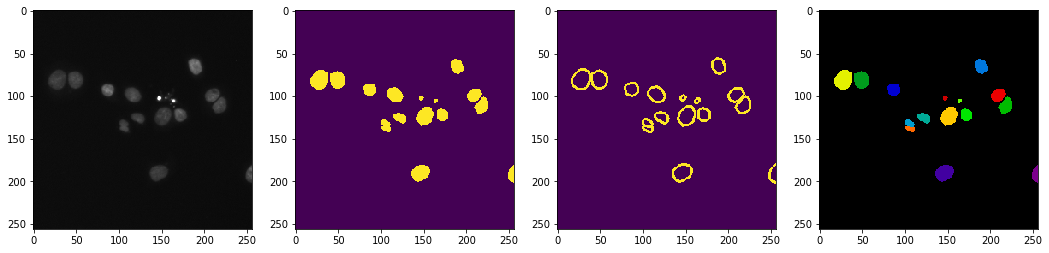

In [22]:
if __name__=="__main__":
    images, binary_masks, contours_masks, colored_masks = read_all_training_data()

    i=5
    plt.figure(figsize=(18, 18))
    plt.subplot(1,4,1)
    plt.imshow(images[i])
    plt.subplot(1,4,2)
    plt.imshow(binary_masks[i])
    plt.subplot(1,4,3)
    plt.imshow(contours_masks[i])
    plt.subplot(1,4,4)
    plt.imshow(colored_masks[i])

In [23]:
def get_all_data_shapes(images, verbose=0):
    shapes = pd.Series([img.shape for img in images])

    if verbose>0:
        print(shapes.value_counts())
    
    return shapes

In [ ]:
def reshape_all_images_and_save_orig_shapes(images, new_size=(256, 256)):
    orig_shapes = get_all_data_shapes(images)
    return np.stack([cv2.resize(image, new_size) for image in images]),  np.array(orig_shapes)

In [ ]:
def reshape_images_to_orig_shapes(images, orig_sizes):
    imgs = [cv2.resize(image, image_org_size) for image, image_org_size in zip(images, orig_sizes)]
    return imgs

In [24]:
if __name__=="__main__":
    shapes = get_all_data_shapes(images)

(256, 256, 3)      334
(256, 320, 3)      111
(520, 696, 3)       90
(360, 360, 3)       90
(1024, 1024, 3)     16
(512, 640, 3)       13
(603, 1272, 3)       6
(260, 347, 3)        3
(1040, 1388, 3)      1
dtype: int64


In [ ]:
def plot_image(img):
    parms_dict = {}
    if len(img.shape)==4 and img.shape[0]==1:
        img = img.squeeze(axis=0)
    if len(img.shape)==3 and img.shape[-1]==1:
        img = img.squeeze(axis=-1)
        parms_dict["cmap"] = plt.get_cmap("gray")

    if img.max()>1:
        img = img/255.
    plt.imshow(img, **parms_dict)

In [1]:
def plot_list_of_images_in_a_row(images_list, titles_list=None):
    n = len(images_list)
    plt.figure(figsize=(18, 5))
    for i, img in enumerate(images_list):
        plt.subplot(1,n,i+1)
        plot_image(img)
        if titles_list is not None:
            plt.title(titles_list[i])

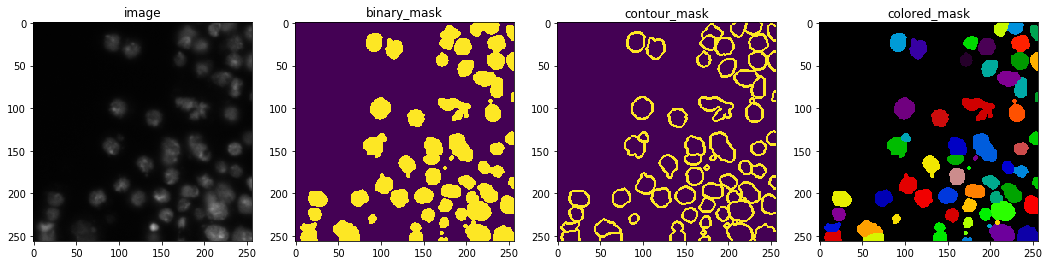

In [26]:
if __name__=="__main__":
    plot_list_of_images_in_a_row([images[6], binary_masks[6], contours_masks[6], colored_masks[6]], 
                                 ["image", "binary_mask", "contour_mask", "colored_mask"])